<a href="https://colab.research.google.com/github/aleylani/Python-AI24/blob/main/exercises/10_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b)

<img src="../assets/numpy_1b.png" width = 300>

</details>




In [3]:
# a)

import numpy as np


possible_results = list(range(1, 7))
mean_result_value = np.mean(possible_results)

print(f"The theoretical mean value from a dice is {mean_result_value}.")

The theoretical mean value from a dice is 3.5.


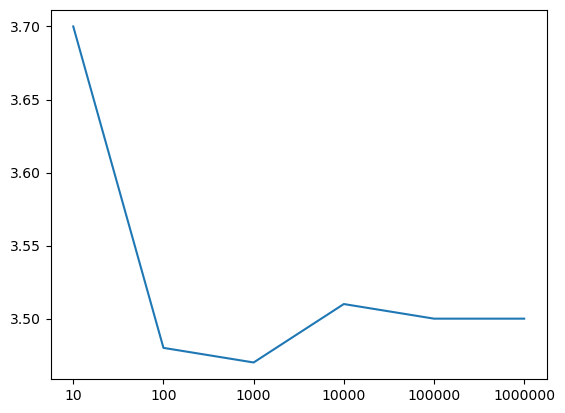

In [28]:
# b)

import numpy as np
import random
import matplotlib.pyplot as plt


nums_rolls = [10**i for i in range(1, 7)]
mean_roll_vals = []
for num_rolls in nums_rolls:
    rolls = [random.randint(1, 6) for _ in range(num_rolls)]
    mean_roll_val = round(np.mean(rolls), 2)
    mean_roll_vals.append(mean_roll_val)

plt.plot([f'{num_rolls}' for num_rolls in nums_rolls], mean_roll_vals)
plt.show()

---
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a)

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a)

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b)

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count:
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d)


<img src="../assets/numpy2d.png" width = 300>


e)

<img src="../assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

In [8]:
# a)

import numpy as np


sample_space = np.array([[i + j for j in range(1, 7)] for i in range(1, 7)])

print(sample_space)

[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]


In [14]:
# b)

import numpy as np


sample_space = np.array([[i + j for j in range(1, 7)] for i in range(1, 7)])

vals_cases = {}
for row in sample_space:
    for val in row:
        if val not in vals_cases:
            vals_cases[val] = 1
        else:
            vals_cases[val] += 1

print("Möjliga resultat:")
for val, case in vals_cases.items():
    print(f"  {val}: {case} fall")

Möjliga resultat:
  2: 1 fall
  3: 2 fall
  4: 3 fall
  5: 4 fall
  6: 5 fall
  7: 6 fall
  8: 5 fall
  9: 4 fall
  10: 3 fall
  11: 2 fall
  12: 1 fall


In [26]:
# c)

import numpy as np


sample_space = np.array([[i + j for j in range(1, 7)] for i in range(1, 7)])

vals_cases = {}
for row in sample_space:
    for val in row:
        if val not in vals_cases:
            vals_cases[val] = 1
        else:
            vals_cases[val] += 1

total_num_cases = len(sample_space) * len(sample_space[0])
vals_freqs = {val: cases/total_num_cases for val, cases in vals_cases.items()}
freqs_sum = round(sum(vals_freqs.values()), 3)

print("Frekvens av möjliga resultat:")
for val, freq in vals_freqs.items():
    print(f"  {val}: {round(freq, 3)}")
print()
print(f"Summa av frekvenser: {freqs_sum}")

Frekvens av möjliga resultat:
  2: 0.028
  3: 0.056
  4: 0.083
  5: 0.111
  6: 0.139
  7: 0.167
  8: 0.139
  9: 0.111
  10: 0.083
  11: 0.056
  12: 0.028

Summa av frekvenser: 1.0


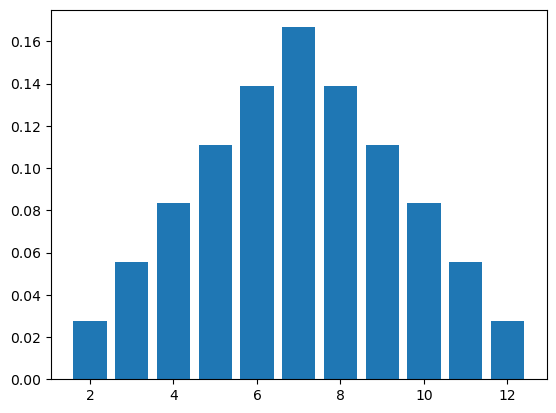

In [32]:
# d)

import numpy as np
import matplotlib.pyplot as plt


sample_space = np.array([[i + j for j in range(1, 7)] for i in range(1, 7)])

vals_cases = {}
for row in sample_space:
    for val in row:
        if val not in vals_cases:
            vals_cases[val] = 1
        else:
            vals_cases[val] += 1

total_num_cases = len(sample_space) * len(sample_space[0])
vals_freqs = {val: cases/total_num_cases for val, cases in vals_cases.items()}

plt.bar(vals_freqs.keys(), vals_freqs.values())
plt.show()

In [56]:
# e)

import numpy as np


dice_vals = np.array(range(1, 7))
num_dices_and_outcomes = {1: np.meshgrid(dice_vals),
                          2: np.meshgrid(dice_vals, dice_vals),
                          3: np.meshgrid(dice_vals, dice_vals, dice_vals),
                          4: np.meshgrid(dice_vals, dice_vals, dice_vals, dice_vals)}

num_dices_and_sums = {}
for dices, all_outcomes in num_dices_and_outcomes.items():
    outcome_sums = None
    for dice_outcomes in all_outcomes:
        if outcome_sums is None:
            outcome_sums = dice_outcomes
        else:
            outcome_sums += dice_outcomes
    num_dices_and_sums[dices] = outcome_sums

num_dices_sums_and_cases = {dices: {}}

[[[[ 4  5  6  7  8  9]
   [ 5  6  7  8  9 10]
   [ 6  7  8  9 10 11]
   [ 7  8  9 10 11 12]
   [ 8  9 10 11 12 13]
   [ 9 10 11 12 13 14]]

  [[ 5  6  7  8  9 10]
   [ 6  7  8  9 10 11]
   [ 7  8  9 10 11 12]
   [ 8  9 10 11 12 13]
   [ 9 10 11 12 13 14]
   [10 11 12 13 14 15]]

  [[ 6  7  8  9 10 11]
   [ 7  8  9 10 11 12]
   [ 8  9 10 11 12 13]
   [ 9 10 11 12 13 14]
   [10 11 12 13 14 15]
   [11 12 13 14 15 16]]

  [[ 7  8  9 10 11 12]
   [ 8  9 10 11 12 13]
   [ 9 10 11 12 13 14]
   [10 11 12 13 14 15]
   [11 12 13 14 15 16]
   [12 13 14 15 16 17]]

  [[ 8  9 10 11 12 13]
   [ 9 10 11 12 13 14]
   [10 11 12 13 14 15]
   [11 12 13 14 15 16]
   [12 13 14 15 16 17]
   [13 14 15 16 17 18]]

  [[ 9 10 11 12 13 14]
   [10 11 12 13 14 15]
   [11 12 13 14 15 16]
   [12 13 14 15 16 17]
   [13 14 15 16 17 18]
   [14 15 16 17 18 19]]]


 [[[ 5  6  7  8  9 10]
   [ 6  7  8  9 10 11]
   [ 7  8  9 10 11 12]
   [ 8  9 10 11 12 13]
   [ 9 10 11 12 13 14]
   [10 11 12 13 14 15]]

  [[ 6  7  8  9 10